# Projeto Padrões de Projeto

# Treinamento da Rede

Esta implementação tem como objetivo criar o treinamento da rede com curriculos os dados oriundos do lattes para classificação de demandas.

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
pd.set_option('display.max_columns', 131)
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_colwidth', -1)

## Indice:
* [1. Carga dos Dados](#first-bullet)
* [2. Criação das Features](#second-bullet)
* [3. Treinamento da Rede](#4th-bullet)
* [4. Matrix de Confusão](#5th-bullet)


## 1. Carga dos dados <a class="anchor" id="first-bullet"></a>
As informações utilizadas para treinamento o  serão carregadas do arquivo dados_treino.csv ,arquivo criado com base nos dados oriundos do lattes

In [3]:
df = pd.read_csv("dados_treino.csv",sep=';')

In [4]:
df.head()

,Descricao,Class
0,possui graduacao em ciencias sociais pela universidade do vale do paraiba possui especializacao em gestao estrategica da inovacao tecnologica pela unicamp atualmente e professor de inovacao e empreendedorismo da fatec sao jose dos campos tem experiencia na area de gestao de projetos de inovacao atuando principalmente nos seguintes temas inovacao tecnologica gestao de projetos parques tecnologicos incubadoras modelagem de negocios e captacao de recursos publicos e privados ciencias sociais,0
1,possui graduacao em direito pela faculdade de direito de taubate graduacao em letras pela faculdade de filosofia ciencias e letras de taubate graduacao em pedagogia pela faculdade de educacao de guaratingueta mestrado em direito pela pontificia universidade catolica de sao paulo e doutorado em direito pela pontificia universidade catolica de sao paulo atualmente e professora de direito e comunicacao e expressao da faculdade de tecnologia de sao jose dos campos direito letras pedagogia direito law direito law,0
2,mestre em engenharia eletronica e computacao instituo tecnologico de aeronautica engenheiro de infraestrutura aeronautica instituto tecnologico de aeronautica professor da faculdade de tecnologia de sao jose dos campos das disciplinas arquitetura e organizacao de computadores fundamentos de redes de computadores tecnologia e ambiente e meio ambiente e saude professor da disciplina ciencias ambientais e das aguas da faculdade de tecnologia de jacarei socio diretor das empresas micro assist infomatica ltda e actie ltda com sede em sao jose dos campos experiencia na area de informatica redes de computadores microcomputadores cabeamento estruturado de redes fibras oticas etc engenharia civil engenharia mecanica transmissao e conservacao de energia educacao em energia e meio ambiente ex diretor da fatec guaratingueta ex diretor da fatec sao jose dos campos e ex coordenador dos cursos de estruturas leves automacao aeronautica e projetos de estruturas aeronauticas da fatec sao jose dos campos engenharia de infreestrutura aeronautica estudo comparativo tecnico e economico entre metodos de dimensionamento de pavimentos aeroportuarios formacao de oficiais aviadores engenharia eletronica e computacao um sistema computadorizado de baixo custo para treinar controladores em radar de aproximacao de precisao sipar electric engineering controle de trafego aereo engenharia mecanica mechanical engineering,0
3,possui graduacao em fisica pela universidade de sao paulo mestrado em sensoriamento remoto pelo instituto nacional de pesquisas espaciais e doutorado em computacao aplicada pelo instituto nacional de pesquisas espaciais tem experiencia na area de computacao com enfase em otimizacao combinatoria atuando principalmente nos seguintes temas problemas de localizacao problema das pmedianas capacitado problema de roteamento de veiculos tendo interesse tambem por programacao orientada a objetos e algoritmos atualmente professor categoria iiid e coordenador do curso de tecnologia em analise e desenvolvimento de sistema da fatec de sao jose dos campos fisica sensoriamento remoto simulacao do coeficiente de retroespalhamento de radar na banda c para solos nus tipicos do estado de sao paulo geosciences retroespalhamento radar computacao aplicada heuristica de localizacaoalocacao para problemas de localizacao de facilidades computer science,0
4,possui graduacao em ciencia da computacao pelo centro universitario do triangulo mestrado e doutorado em computacao aplicada pelo inpe instituto nacional de pesquisas espaciais atuou em projetos de armazenamento e disseminacao de dados ambientais no inpe atualmente e professor da etep faculdades centro universitario eniac faculdade inpg de sao jose dos campos e fatec de jacarei e sao jose dos campos possui experiencia na area de ciencia da computacao com enfase em banco de dados e desenvolvimento de sistemas web ciencia da computacao computacao aplicada esqueletos isotropicos computer science morfo

In [5]:
df1 = df[df['Class']==0]
df2 = df[df['Class']==1]
df3 = df[df['Class']==2]

In [13]:
df1

,Descricao,Class
0,possui graduacao em ciencias sociais pela universidade do vale do paraiba possui especializacao em gestao estrategica da inovacao tecnologica pela unicamp atualmente e professor de inovacao e empreendedorismo da fatec sao jose dos campos tem experiencia na area de gestao de projetos de inovacao atuando principalmente nos seguintes temas inovacao tecnologica gestao de projetos parques tecnologicos incubadoras modelagem de negocios e captacao de recursos publicos e privados ciencias sociais,0
1,possui graduacao em direito pela faculdade de direito de taubate graduacao em letras pela faculdade de filosofia ciencias e letras de taubate graduacao em pedagogia pela faculdade de educacao de guaratingueta mestrado em direito pela pontificia universidade catolica de sao paulo e doutorado em direito pela pontificia universidade catolica de sao paulo atualmente e professora de direito e comunicacao e expressao da faculdade de tecnologia de sao jose dos campos direito letras pedagogia direito law direito law,0
2,mestre em engenharia eletronica e computacao instituo tecnologico de aeronautica engenheiro de infraestrutura aeronautica instituto tecnologico de aeronautica professor da faculdade de tecnologia de sao jose dos campos das disciplinas arquitetura e organizacao de computadores fundamentos de redes de computadores tecnologia e ambiente e meio ambiente e saude professor da disciplina ciencias ambientais e das aguas da faculdade de tecnologia de jacarei socio diretor das empresas micro assist infomatica ltda e actie ltda com sede em sao jose dos campos experiencia na area de informatica redes de computadores microcomputadores cabeamento estruturado de redes fibras oticas etc engenharia civil engenharia mecanica transmissao e conservacao de energia educacao em energia e meio ambiente ex diretor da fatec guaratingueta ex diretor da fatec sao jose dos campos e ex coordenador dos cursos de estruturas leves automacao aeronautica e projetos de estruturas aeronauticas da fatec sao jose dos campos engenharia de infreestrutura aeronautica estudo comparativo tecnico e economico entre metodos de dimensionamento de pavimentos aeroportuarios formacao de oficiais aviadores engenharia eletronica e computacao um sistema computadorizado de baixo custo para treinar controladores em radar de aproximacao de precisao sipar electric engineering controle de trafego aereo engenharia mecanica mechanical engineering,0
3,possui graduacao em fisica pela universidade de sao paulo mestrado em sensoriamento remoto pelo instituto nacional de pesquisas espaciais e doutorado em computacao aplicada pelo instituto nacional de pesquisas espaciais tem experiencia na area de computacao com enfase em otimizacao combinatoria atuando principalmente nos seguintes temas problemas de localizacao problema das pmedianas capacitado problema de roteamento de veiculos tendo interesse tambem por programacao orientada a objetos e algoritmos atualmente professor categoria iiid e coordenador do curso de tecnologia em analise e desenvolvimento de sistema da fatec de sao jose dos campos fisica sensoriamento remoto simulacao do coeficiente de retroespalhamento de radar na banda c para solos nus tipicos do estado de sao paulo geosciences retroespalhamento radar computacao aplicada heuristica de localizacaoalocacao para problemas de localizacao de facilidades computer science,0
4,possui graduacao em ciencia da computacao pelo centro universitario do triangulo mestrado e doutorado em computacao aplicada pelo inpe instituto nacional de pesquisas espaciais atuou em projetos de armazenamento e disseminacao de dados ambientais no inpe atualmente e professor da etep faculdades centro universitario eniac faculdade inpg de sao jose dos campos e fatec de jacarei e sao jose dos campos possui experiencia na area de ciencia da computacao com enfase em banco de dados e desenvolvimento de sistemas web ciencia da computacao computacao aplicada esqueletos isotropicos computer science morfo

In [7]:
lista = list(df1['Descricao'])
lista2 = list(df2['Descricao'])
lista3 = list(df3['Descricao'])

In [10]:
lista3

['doutora em ciencias  engenharia da computacao  mestre em ciencias  engenharia eletronica e computacao  e graduada em matematica pela universidade do vale do paraiba atualmente e professora de ensino superior da fatec  de sao jose dos campos e professora efetiva do governo do estado de sao paulo possui experiencia nas areas de matematica e informaticatopicos de interesse mineracao de dados busca e recuperacao de informacao semantica processamento de linguagem natural processo ensinoaprendizagem web semantica big data ontologia linked data matematica probabilidade e estatistica um dos campos de analise em matematica engenharia eletronica e computacao uma arquitetura para sistemas tutores inteligentes apoiada por fundamentos de web semantica electric engineering web semantica engenharia eletronica e computacao analise da relevancia semantica na selecao de atributos para a mineracao de dados electric engineering',
 'possui graduacao em letras pela universidade de sao paulo  e mestrado em

## 2. Criação das Features <a class="anchor" id="second-bullet"></a>

In [5]:
count_words = df.Descricao.str.split(expand=True).stack().value_counts().index.tolist()

In [7]:
len(count_words)

2144

In [8]:
colunas = count_words
df = df[['Descricao','Class']]

# Criando as colunas no dataframe.
for col in colunas:
    df[col] = 0

In [9]:
for x in colunas:
    df[x] = df['Descricao'].str.count(x)

In [10]:
df1 = df[df['Class'] == 0]
df2 = df[df['Class'] == 1]
df3 = df[df['Class'] == 2]

In [11]:
a, b = np.split(df1, [int(.2*len(df1))])
c, d = np.split(df2, [int(.2*len(df2))])
e, f = np.split(df3, [int(.2*len(df3))])

In [12]:
frames_treino = [b,d,f]
frames_teste = [a,c,e]

In [13]:
df = pd.concat(frames_treino)
df2 = pd.concat(frames_teste)

In [19]:
df

,Descricao,Class,de,e,em,engenharia,da,do,pela,na,sao,universidade,tecnologia,dos,aeronautica,mecanica,graduacao,jose,com,faculdade,campos,a,no,experiencia,professor,para,area,gestao,pelo,computacao,como,possui,instituto,fatec,engineering,desenvolvimento,atualmente,ensino,mestrado,projetos,paulo,matematica,administracao,tem,tecnologico,sistemas,ciencias,nos,enfase,curso,materiais,producao,letras,anos,doutorado,cursos,atuando,o,ciencia,taubate,empresas,nas,ingles,analise,educacao,...,criou,friuli,empreendedor,legislacoes,especializados,patente,bretanha,solidaria,steels,metropolitana,ici,suspensoes,rwth,del,eletromecanicos,flybywire,analista,celulose,visitante,final,fm,futuros,armando,economica,subconjuntos,pmedianas,gmp,resultados,ceag,plastica,sintetizadas,peru,circuitos,controls,intraurbana,permanencia,ministradas,telas,representacoes,demacunesp,practices,unitauespecialista,quality,vigas,estaticas,instrumetacao,tensao,segmentos,localiza,mrpii,intitulado,principais,angular,acoesiniciativas,inovadora,analogicodigital,platina,smssou,torno,acos,schedule,iniciou,certificacao,administrativas,aproticos
5,bacharelado em ciencia da computacao coral prototipo de uma linguagem orientada a objetos usando geradores de compiladores java engenharia eletronica e computacao esqueletotipacao um metodo para desenvolvimento de software embarcado baseado em modelos electric engineering software embarcado engenharia e tecnologia espaciais metodo de verificacao e validacao formal em analise estruturada simultanea aerospace engineering,0,6,54,6,2,4,9,0,1,0,0,1,0,0,0,0,0,3,0,0,54,1,0,0,1,0,0,0,2,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,possui graduacao em ciencias sociais aplicadas pela universidade do vale do paraiba e graduacao em administracao uniderp atualmente e professor assistente da universidade paulista professor do centro estadual de educacao tecnologica paula souza atuando principalmente nos seguintes temas globalizacao empregabilidade custos logisticos capacidade produtiva e engenharia dos transportes administracao geral ciencias sociais aplicadas,0,6,38,4,1,7,5,1,0,0,2,0,1,0,0,2,0,0,0,0,60,2,0,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,1,0,0,2,1,0,0,0,0,0,0,0,0,1,29,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,possuo graduacao em ciencia da computacao pela universidade de taubate professional coach certification pela sociedade latino americana de coaching especializacao em engenharia de sistemas pelo escola superior aberto do brasil especializacao em formacao pedagogicalicenciatura plena pela universidade metodista de piracicaba e tecnico em processamento de dados pelo colegio idesa sou professor da fatec faculdade de tecnologia de sao jose dos campos no curso de analise e desenvolvimento de sistemas onde leciono gestao de projetos sistemas de informacao e gestao e governanca de ti e etec joao gomes de araujo no curso tecnico em informatica atualmente trabalho no curso de gestao empresarial da fatec modalidade a distancia como professor responsavel pela disciplina sociedade tecnologia e inovacao mediador online da disciplina de informatica aplicada e coordenador de projetos ead tenho experiencia na empresa gerdau onde trabalhei com gestao de tic durante anos atuando principalmente com banco de dados implantacao de projetos de sistemas erpsap e desenvolvimento de bi processamento de dados estagio supervisionado engenharia eletronica e computacao tecnologia broner aplicada na siderurgia electric engineering,0,35,146,11,2,18,9,4,11,1,2,3,4,0,0,1,1,5,1,1,136,10,1,2,0,0,4,2,2,1,0,0,2,1,2,1,0,0,3,0,0,0,4,0,4,0,1,0,3,0,0,0,1,0,0,1,110,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,b

In [20]:
x_train.head()

,Class,de,e,em,engenharia,da,do,pela,na,sao,universidade,tecnologia,dos,aeronautica,mecanica,graduacao,jose,com,faculdade,campos,a,no,experiencia,professor,para,area,gestao,pelo,computacao,como,possui,instituto,fatec,engineering,desenvolvimento,atualmente,ensino,mestrado,projetos,paulo,matematica,administracao,tem,tecnologico,sistemas,ciencias,nos,enfase,curso,materiais,producao,letras,anos,doutorado,cursos,atuando,o,ciencia,taubate,empresas,nas,ingles,analise,educacao,especializacao,...,criou,friuli,empreendedor,legislacoes,especializados,patente,bretanha,solidaria,steels,metropolitana,ici,suspensoes,rwth,del,eletromecanicos,flybywire,analista,celulose,visitante,final,fm,futuros,armando,economica,subconjuntos,pmedianas,gmp,resultados,ceag,plastica,sintetizadas,peru,circuitos,controls,intraurbana,permanencia,ministradas,telas,representacoes,demacunesp,practices,unitauespecialista,quality,vigas,estaticas,instrumetacao,tensao,segmentos,localiza,mrpii,intitulado,principais,angular,acoesiniciativas,inovadora,analogicodigital,platina,smssou,torno,acos,schedule,iniciou,certificacao,administrativas,aproticos
5,0,6,54,6,2,4,9,0,1,0,0,1,0,0,0,0,0,3,0,0,54,1,0,0,1,0,0,0,2,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,6,38,4,1,7,5,1,0,0,2,0,1,0,0,2,0,0,0,0,60,2,0,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,1,0,0,2,1,0,0,0,0,0,0,0,0,1,29,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,35,146,11,2,18,9,4,11,1,2,3,4,0,0,1,1,5,1,1,136,10,1,2,0,0,4,2,2,1,0,0,2,1,2,1,0,0,3,0,0,0,4,0,4,0,1,0,3,0,0,0,1,0,0,1,110,1,1,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,25,92,8,2,16,8,2,2,2,3,3,2,0,0,0,0,0,2,0,103,5,0,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,2,0,3,0,0,2,0,0,0,0,3,1,0,0,0,0,62,2,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,23,122,16,5,10,4,7,9,1,4,1,1,2,0,2,1,3,2,1,153,3,1,2,3,1,0,1,0,2,0,0,2,0,0,1,0,0,0,0,6,1,7,0,0,2,1,0,0,0,2,0,1,0,0,0,64,2,1,0,0,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
x_train = df.copy()
#y_train = train_dataset['produto_id']
y_train = df['Class']
#remove os campos relacionados a descrição e labels (produto_id)
del x_train['Descricao']

In [23]:
def gerawords(desc):
    return desc.lower().split()

In [24]:
codtotal={}
wordtotal={}

for d in df['Descricao']:
    for w in gerawords(d):
        if w not in wordtotal:
            wordtotal[w] = len(wordtotal)
for d in df['Class']:    
    if d not in codtotal:
        codtotal[d] = len(codtotal)

In [25]:
x_train.head()

,Class,de,e,em,engenharia,da,do,pela,na,sao,universidade,tecnologia,dos,aeronautica,mecanica,graduacao,jose,com,faculdade,campos,a,no,experiencia,professor,para,area,gestao,pelo,computacao,como,possui,instituto,fatec,engineering,desenvolvimento,atualmente,ensino,mestrado,projetos,paulo,matematica,administracao,tem,tecnologico,sistemas,ciencias,nos,enfase,curso,materiais,producao,letras,anos,doutorado,cursos,atuando,o,ciencia,taubate,empresas,nas,ingles,analise,educacao,especializacao,...,criou,friuli,empreendedor,legislacoes,especializados,patente,bretanha,solidaria,steels,metropolitana,ici,suspensoes,rwth,del,eletromecanicos,flybywire,analista,celulose,visitante,final,fm,futuros,armando,economica,subconjuntos,pmedianas,gmp,resultados,ceag,plastica,sintetizadas,peru,circuitos,controls,intraurbana,permanencia,ministradas,telas,representacoes,demacunesp,practices,unitauespecialista,quality,vigas,estaticas,instrumetacao,tensao,segmentos,localiza,mrpii,intitulado,principais,angular,acoesiniciativas,inovadora,analogicodigital,platina,smssou,torno,acos,schedule,iniciou,certificacao,administrativas,aproticos
5,0,6,54,6,2,4,9,0,1,0,0,1,0,0,0,0,0,3,0,0,54,1,0,0,1,0,0,0,2,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,6,38,4,1,7,5,1,0,0,2,0,1,0,0,2,0,0,0,0,60,2,0,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,1,0,0,2,1,0,0,0,0,0,0,0,0,1,29,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,35,146,11,2,18,9,4,11,1,2,3,4,0,0,1,1,5,1,1,136,10,1,2,0,0,4,2,2,1,0,0,2,1,2,1,0,0,3,0,0,0,4,0,4,0,1,0,3,0,0,0,1,0,0,1,110,1,1,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,25,92,8,2,16,8,2,2,2,3,3,2,0,0,0,0,0,2,0,103,5,0,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,2,0,3,0,0,2,0,0,0,0,3,1,0,0,0,0,62,2,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,23,122,16,5,10,4,7,9,1,4,1,1,2,0,2,1,3,2,1,153,3,1,2,3,1,0,1,0,2,0,0,2,0,0,1,0,0,0,0,6,1,7,0,0,2,1,0,0,0,2,0,1,0,0,0,64,2,1,0,0,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
y_train.head()

5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

In [41]:
x_test = df2.copy()
y_test = df2['Class']

In [42]:
del x_test['Descricao']
print(x_train.shape)
print(x_test.shape)

(84, 2144)
(19, 2145)


In [59]:
matriz = list(x_test.columns)

In [ ]:
a[0,0,3,0,1]

In [60]:
matriz

['Class',
 'de',
 'e',
 'em',
 'engenharia',
 'da',
 'do',
 'pela',
 'na',
 'sao',
 'universidade',
 'tecnologia',
 'dos',
 'aeronautica',
 'mecanica',
 'graduacao',
 'jose',
 'com',
 'faculdade',
 'campos',
 'a',
 'no',
 'experiencia',
 'professor',
 'para',
 'area',
 'gestao',
 'pelo',
 'computacao',
 'como',
 'possui',
 'instituto',
 'fatec',
 'engineering',
 'desenvolvimento',
 'atualmente',
 'ensino',
 'mestrado',
 'projetos',
 'paulo',
 'matematica',
 'administracao',
 'tem',
 'tecnologico',
 'sistemas',
 'ciencias',
 'nos',
 'enfase',
 'curso',
 'materiais',
 'producao',
 'letras',
 'anos',
 'doutorado',
 'cursos',
 'atuando',
 'o',
 'ciencia',
 'taubate',
 'empresas',
 'nas',
 'ingles',
 'analise',
 'educacao',
 'especializacao',
 'eletronica',
 'centro',
 'industrial',
 'superior',
 'por',
 'das',
 'fisica',
 'professora',
 'aplicada',
 'lingua',
 'seguintes',
 'principalmente',
 'estudo',
 'federal',
 'dados',
 'direito',
 'espaciais',
 'um',
 'disciplinas',
 'licenciatura',


In [56]:
import json
with open('matriz.json', 'w') as f:
    json.dump(matriz, f)

In [31]:
dfx_train = x_train
dfy_train = y_train
dfx_test = x_test
dfy_test = y_test
x_train = x_train[count_words]
x_test = x_test[count_words]
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
x_train

array([[  6,  54,   6, ...,   0,   0,   0],
       [  6,  38,   4, ...,   0,   0,   0],
       [ 35, 146,  11, ...,   0,   0,   0],
       ...,
       [ 20, 123,  10, ...,   0,   0,   0],
       [ 31, 162,  20, ...,   0,   0,   0],
       [ 13,  76,   7, ...,   0,   0,   0]], dtype=int64)

## 3. Treinamento da Rede <a class="anchor" id="4th-bullet"></a>

In [23]:
Sequential = tf.keras.models.Sequential
Activation = tf.keras.layers.Activation 
Dense = tf.keras.layers.Dense 

model = Sequential([
    Dense(100, input_shape=(x_train.shape[1],)),
    Activation('relu'),
    Dense(200, input_shape=(x_train.shape[1],)),
    Activation('tanh'),
    Dense(400, input_shape=(x_train.shape[1],)),
    Activation('relu'),        
    Dense(len(codtotal)),
    #Dense(1),
    Activation('softmax'),
])


model.compile(optimizer='adam',
              #loss='categorical_crossentropy',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               214500    
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               80400     
_________________________________________________________________
activation_2 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1

In [24]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=20)

Train on 84 samples
Epoch 1/100
84/84 [==============================] - 1s 17ms/sample - loss: 1.5454 - accuracy: 0.3452
Epoch 2/100
84/84 [==============================] - 0s 236us/sample - loss: 1.2362 - accuracy: 0.3333
Epoch 3/100
84/84 [==============================] - 0s 249us/sample - loss: 1.0907 - accuracy: 0.3452
Epoch 4/100
84/84 [==============================] - 0s 273us/sample - loss: 1.1586 - accuracy: 0.3690
Epoch 5/100
84/84 [==============================] - 0s 249us/sample - loss: 1.0110 - accuracy: 0.4762
Epoch 6/100
84/84 [==============================] - 0s 249us/sample - loss: 0.9279 - accuracy: 0.5833
Epoch 7/100
84/84 [==============================] - 0s 249us/sample - loss: 0.8777 - accuracy: 0.5476
Epoch 8/100
84/84 [==============================] - 0s 261us/sample - loss: 0.9254 - accuracy: 0.5595
Epoch 9/100
84/84 [==============================] - 0s 249us/sample - loss: 0.7796 - accuracy: 0.5833
Epoch 10/100
84/84 [==============================] - 

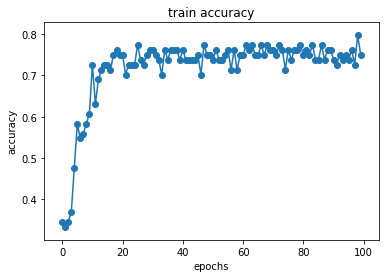

In [26]:
acc = hist.history['accuracy']
plt.plot(acc)
plt.scatter(range(len(acc)),acc)
plt.title("train accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [35]:
## Salvando Modelo

In [36]:
model.save('modelo_java.h5')

In [27]:
y_pred = model.predict(x_test)

In [28]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [29]:
y_pred_i = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
y_test_i = y_test

In [30]:
accuracy = accuracy_score(y_pred_i, y_test_i)
accuracy

0.47368421052631576

In [31]:
report = classification_report(y_test_i, y_pred_i)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.17      0.29         6
           2       0.47      1.00      0.64         8

    accuracy                           0.47        19
   macro avg       0.49      0.39      0.31        19
weighted avg       0.51      0.47      0.36        19



In [32]:
confusion_matrix(y_test_i, y_pred_i, labels=[0, 1, 2])

array([[0, 0, 5],
       [1, 1, 4],
       [0, 0, 8]], dtype=int64)

## 4. Matriz de Confusão <a class="anchor" id="5th-bullet"></a>

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[0 0 5]
 [1 1 4]
 [0 0 8]]


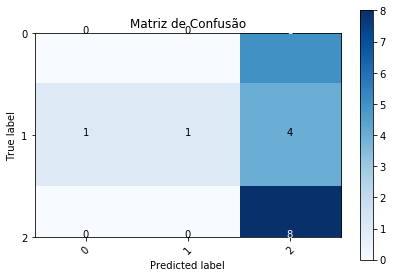

In [34]:
cnf_matrix = confusion_matrix(y_test_i, y_pred_i, labels=[0, 1, 2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2],
                      title='Matriz de Confusão')